In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
data=pd.read_csv('/content/income_evaluation.csv')

## Gathering information about the data set.

In [16]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [18]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Let's see total number of rows and columns in our dataset. Also let's have a look at column names to get a rough idea about information contained in our dataset.

In [19]:
data.shape

(32561, 15)

In [35]:
data.isna().sum() # check for null values.

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


In [20]:
data.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

## Analysis of DataSet

Let's first look closely at information about the oldest and youngest person in the dataset.

In [21]:
data.iloc[data['age'].idxmax()]          # For oldest, We used, idxmax(), for youngest we'll use idxmin().

,222
age,90
workclass,Private
fnlwgt,51744
education,HS-grad
education-num,9
marital-status,Never-married
occupation,Other-service
relationship,Not-in-family
race,Black
sex,Male


In [22]:
data.iloc[data['age'].idxmin()]

,106
age,17
workclass,?
fnlwgt,304873
education,10th
education-num,6
marital-status,Never-married
occupation,?
relationship,Own-child
race,White
sex,Female


Both the youngest and oldest work in private sector.This motivates us to see in which sector most of the people work.

In [23]:
data[' workclass'].value_counts().sort_values(ascending=False)

,count
workclass,
Private,22696
Self-emp-not-inc,2541
Local-gov,2093
?,1836
State-gov,1298
Self-emp-inc,1116
Federal-gov,960
Without-pay,14
Never-worked,7


From above we conclude that a large group of people in the dataset work in private sector.

Next let's see the distribution of people among income classes of income more than 50k and less than 50k respectively.

In [24]:
data[' income'].value_counts().sort_values(ascending=True)

,count
income,
>50K,7841
<=50K,24720


That means most of people earn less than 50k

## Visualizing the Data

In [25]:
plt.rc('figure',figsize=(10,5))

### Income Level

First let's depict income distribution i.e less than or more than 50k.

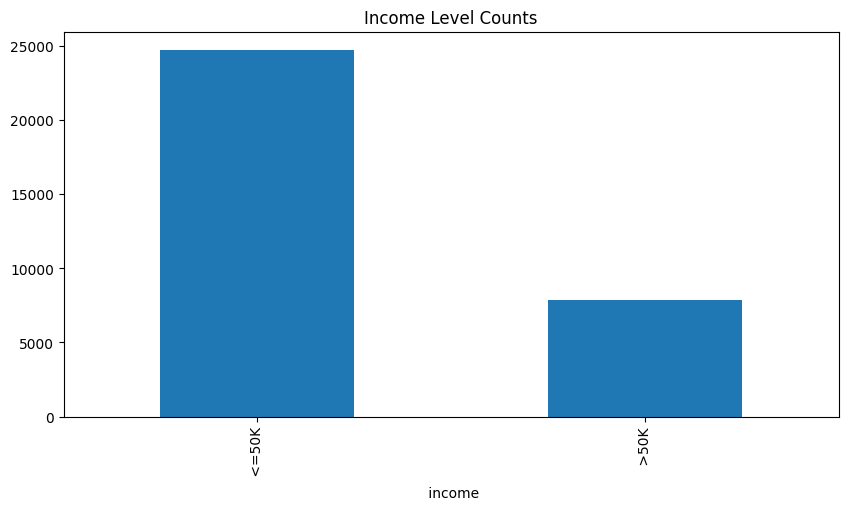

In [26]:
data[' income'].value_counts().plot(kind='bar')
plt.title('Income Level Counts')
plt.show()

### Education

In [27]:
data[' education'].value_counts()

,count
education,
HS-grad,10501
Some-college,7291
Bachelors,5355
Masters,1723
Assoc-voc,1382
11th,1175
Assoc-acdm,1067
10th,933
7th-8th,646


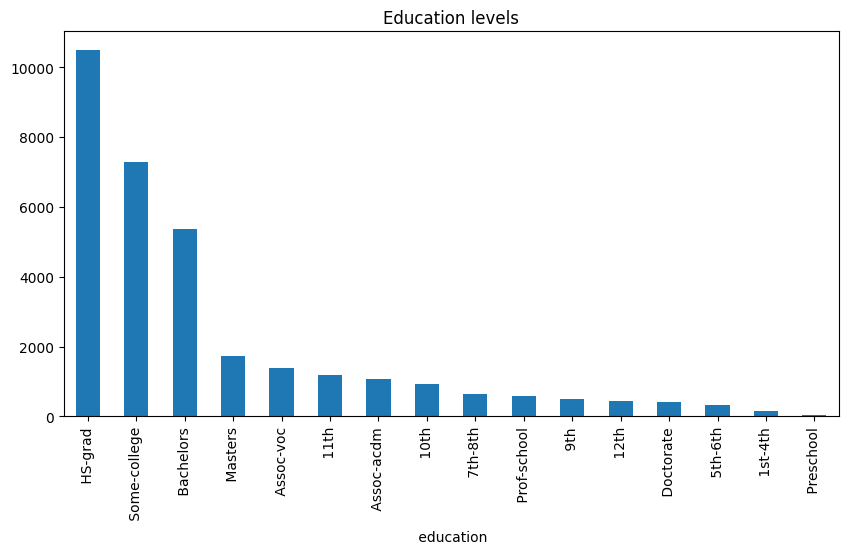

In [30]:
data[' education'].value_counts().plot(kind='bar')
plt.title('Education levels')
plt.show()

We conclude that most of people are high-school graduates.

### Gender Distribution

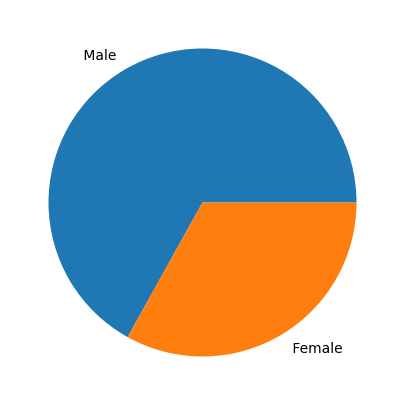

In [38]:
gender=data[' sex'].unique()
plt.pie(data[' sex'].value_counts(),labels= gender)
plt.show()

We conclude that majority of working people are males.

### Age distribution

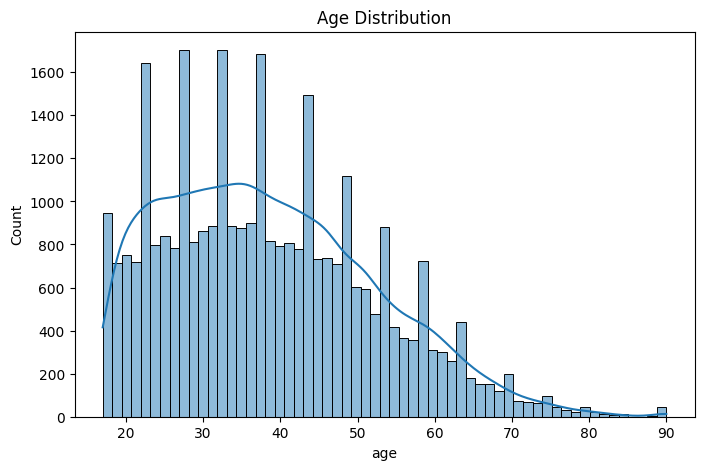

In [49]:
plt.figure(figsize=(8,5))
sns.histplot(data=data, x='age', kde=True)
plt.title("Age Distribution")
plt.show()


We conclude, most people fall in age group of 20-50.

### Income v/s Age

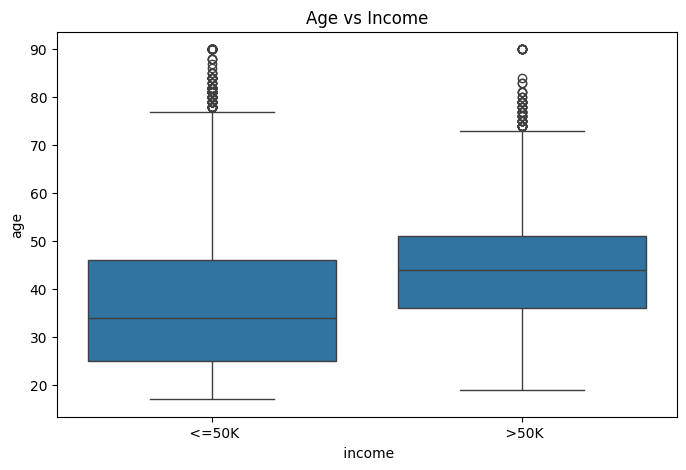

In [51]:
plt.figure(figsize=(8,5))
sns.boxplot(data=data, x=' income', y='age')
plt.title("Age vs Income")
plt.show()


We conclude that people earning >50K tend to be older (peak around 40–55 years). Income increases with experience.

### Influence of Education on Income.

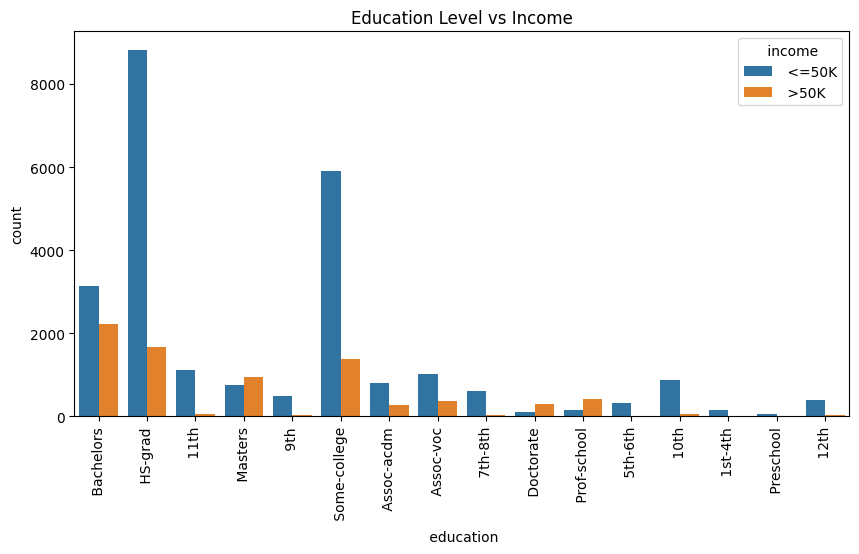

In [53]:
plt.figure(figsize=(10,5))
sns.countplot(data=data, x=' education', hue=' income')
plt.xticks(rotation=90)
plt.title("Education Level vs Income")
plt.show()


Higher education levels (Bachelors, Masters, Doctorate) have a much higher proportion of >50K earners

ddsa

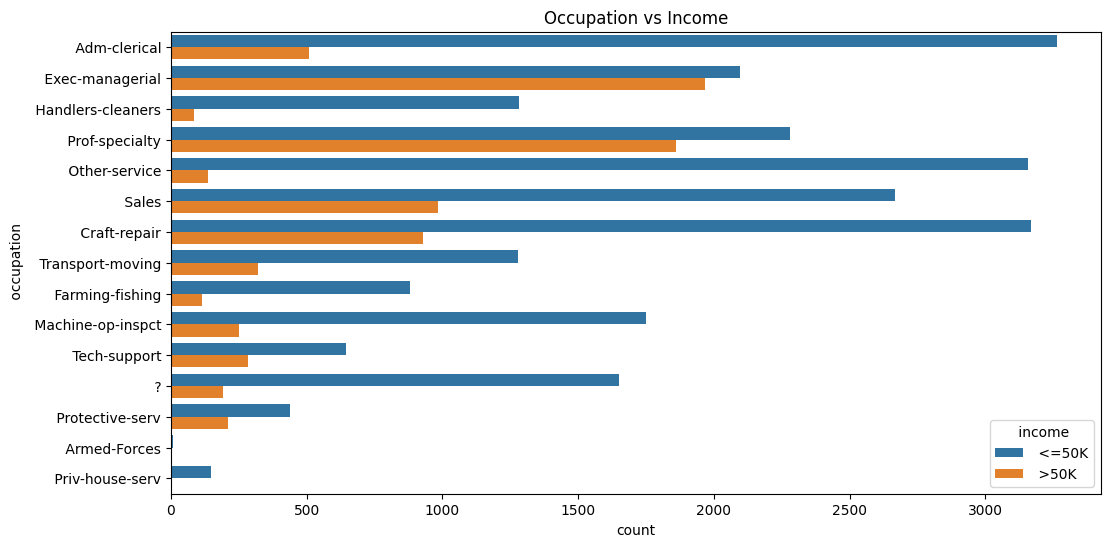

In [54]:
plt.figure(figsize=(12,6))
sns.countplot(data=data, y=' occupation', hue=' income')
plt.title("Occupation vs Income")
plt.show()


High-paying occupations: Exec-managerial, Prof-specialty, Tech

Low-paying: Handlers-cleaners, Farming, Machine-op

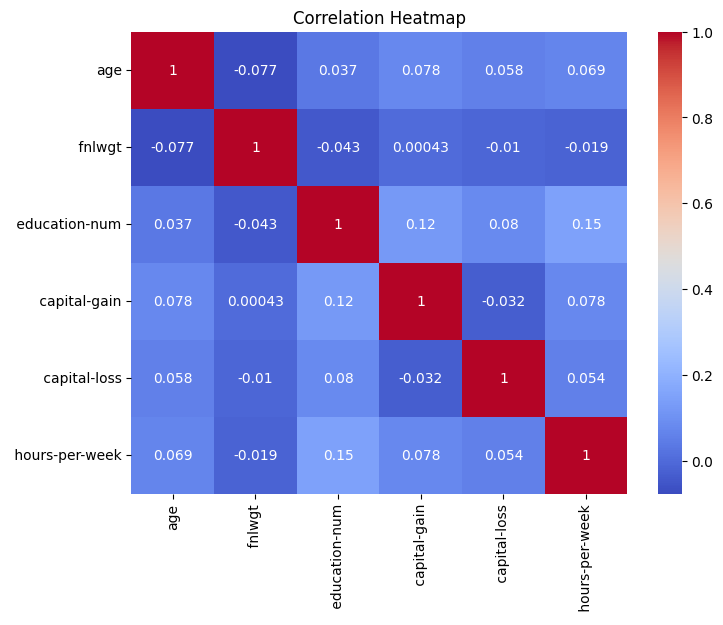

In [56]:
plt.figure(figsize=(8,6))
sns.heatmap(data.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Strongest correlations with income:
education-num (positive)

capital-gain (very positive)

hours-per-week (moderate positive)

age (positive)

### Income Distribution by gender.

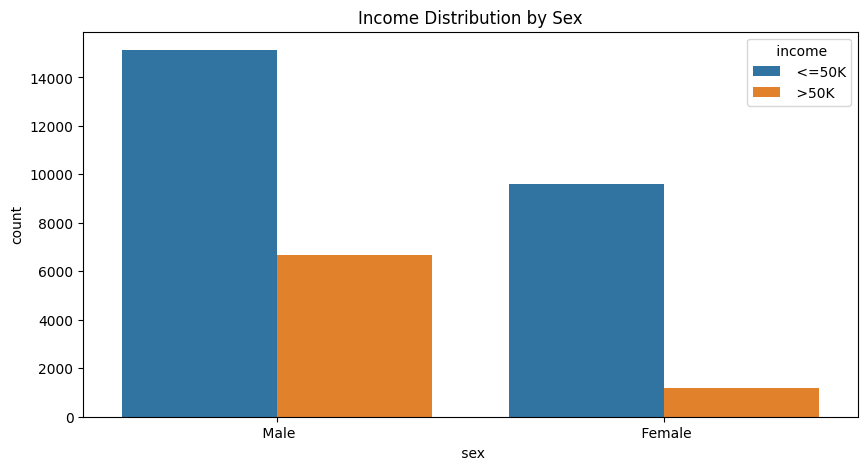

In [57]:
sns.countplot(data=data, x=' sex', hue=' income')
plt.title("Income Distribution by Sex")
plt.show()


## **Conclusion Drawn**
We conclude that among factors that drive high income are:
1. Higher degrees greatly increase the likelihood of earning >50K.
2. Management, professional specialties, and technical roles pay significantly more.
3. Men are more likely to earn above 50K than women, even with similar attributes.
4. Middle-aged individuals (40–55) have the highest rates of >50K.
5. Most of professionals work in private sector.
